# Практична робота № 1
`Системи штучного інтелекту в промисловості`

*Хід роботи*

## Крок 1: Генерація синтетичних даних
Створимо синтетичні дані, що імітують параметри технологічного процесу, такі як
температура, тиск та швидкість потоку, а також вихідний параметр якості.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Кількість точок даних
n_samples = 1000
# Генерація синтетичних даних
np.random.seed(42) # Для відтворюваності
temperature = np.random.normal(loc=150, scale=10, size=n_samples) # Температура (°C)
pressure = np.random.normal(loc=5, scale=1, size=n_samples) # Тиск (атм)
flow_rate = np.random.normal(loc=50, scale=5, size=n_samples) # Швидкість потоку (л/хв)
# Вихідний параметр якості (імітуємо залежність від вхідних параметрів з додаванням шуму)
quality = 0.5 * temperature + 2 * pressure + 0.8 * flow_rate + np.random.normal(
loc=0, scale=20, size=n_samples)
# Створення DataFrame
data = pd.DataFrame({
 'Temperature': temperature,
 'Pressure': pressure,
 'Flow_Rate': flow_rate,
 'Quality': quality
})
print("Перші 5 рядків даних:")
display(data.head())

Перші 5 рядків даних:


,Temperature,Pressure,Flow_Rate,Quality
0,154.967142,6.399355,46.624109,89.425417
1,148.617357,5.924634,49.277407,108.372171
2,156.476885,5.059630,46.037900,116.915913
3,165.230299,4.353063,48.460192,167.843183
4,147.658466,5.698223,40.531927,128.782284


## Крок 2: Завантаження та первинний огляд даних
Тепер уявімо, що ці дані збережені у файл, і ми їх завантажуємо. Зазвичай дані
надходять у форматі CSV.


In [5]:
# Збереження даних у CSV файл (імітація)
data.to_csv('process_data.csv', index=False)
# Завантаження даних з CSV файлу
try:
 loaded_data = pd.read_csv('process_data.csv')
 print("\nДані успішно завантажено з 'process_data.csv'")
 print("\nІнформація про DataFrame:")
 loaded_data.info()
 print("\nОписова статистика даних:")
 display(loaded_data.describe())
except FileNotFoundError:
 print("Помилка: Файл 'process_data.csv' не знайдено.")


Дані успішно завантажено з 'process_data.csv'

Інформація про DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  1000 non-null   float64
 1   Pressure     1000 non-null   float64
 2   Flow_Rate    1000 non-null   float64
 3   Quality      1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB

Описова статистика даних:


,Temperature,Pressure,Flow_Rate,Quality
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,150.193321,5.070836,50.029171,124.887285
std,9.792159,0.997454,4.917271,21.485813
min,117.587327,2.059611,34.902439,60.944904
25%,143.524097,4.393758,46.760002,110.089767
50%,150.253006,5.063077,49.998746,124.926287
75%,156.479439,5.728882,53.304577,139.217232
max,188.527315,8.193108,69.631189,193.598990


# Крок 3: Розвідувальний аналіз даних (EDA)
Виконаємо базовий розвідувальний аналіз, щоб зрозуміти розподіл даних та
взаємозв'язки між змінними.


Кількість пропущених значень у кожному стовпці:


Temperature    0
Pressure       0
Flow_Rate      0
Quality        0
dtype: int64

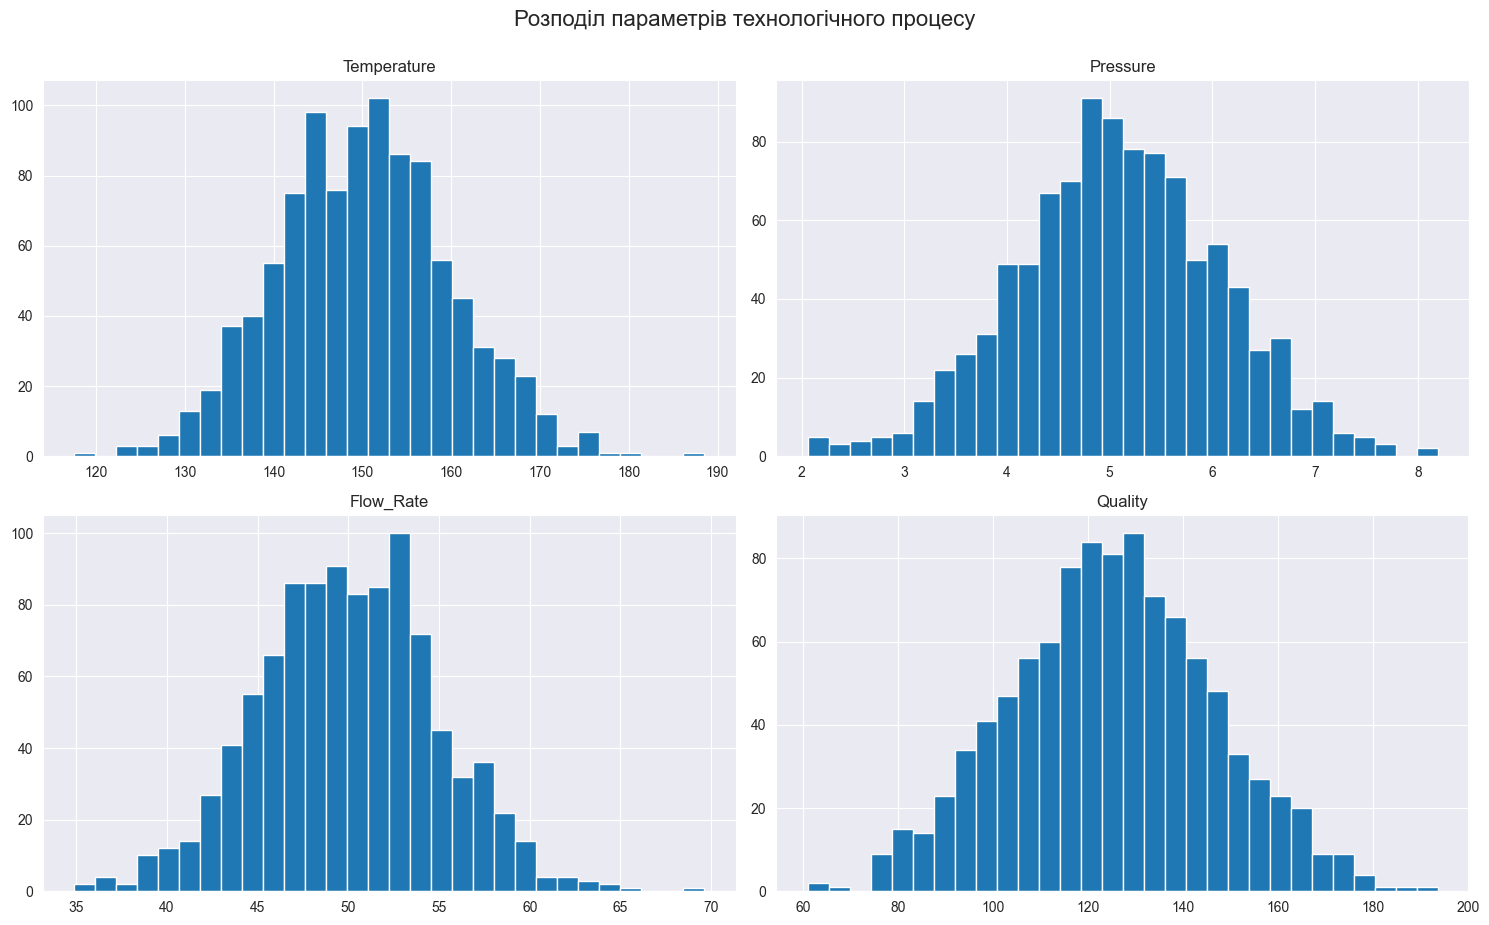

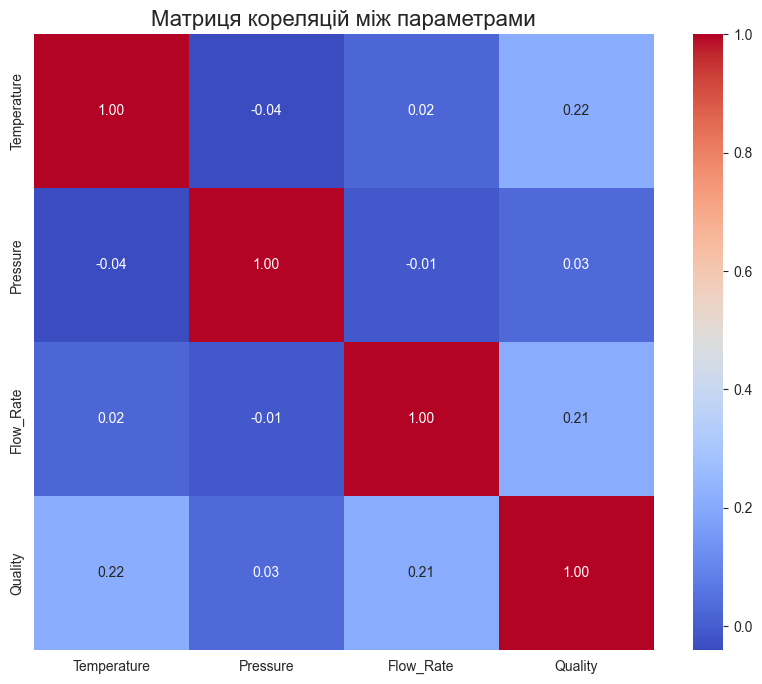

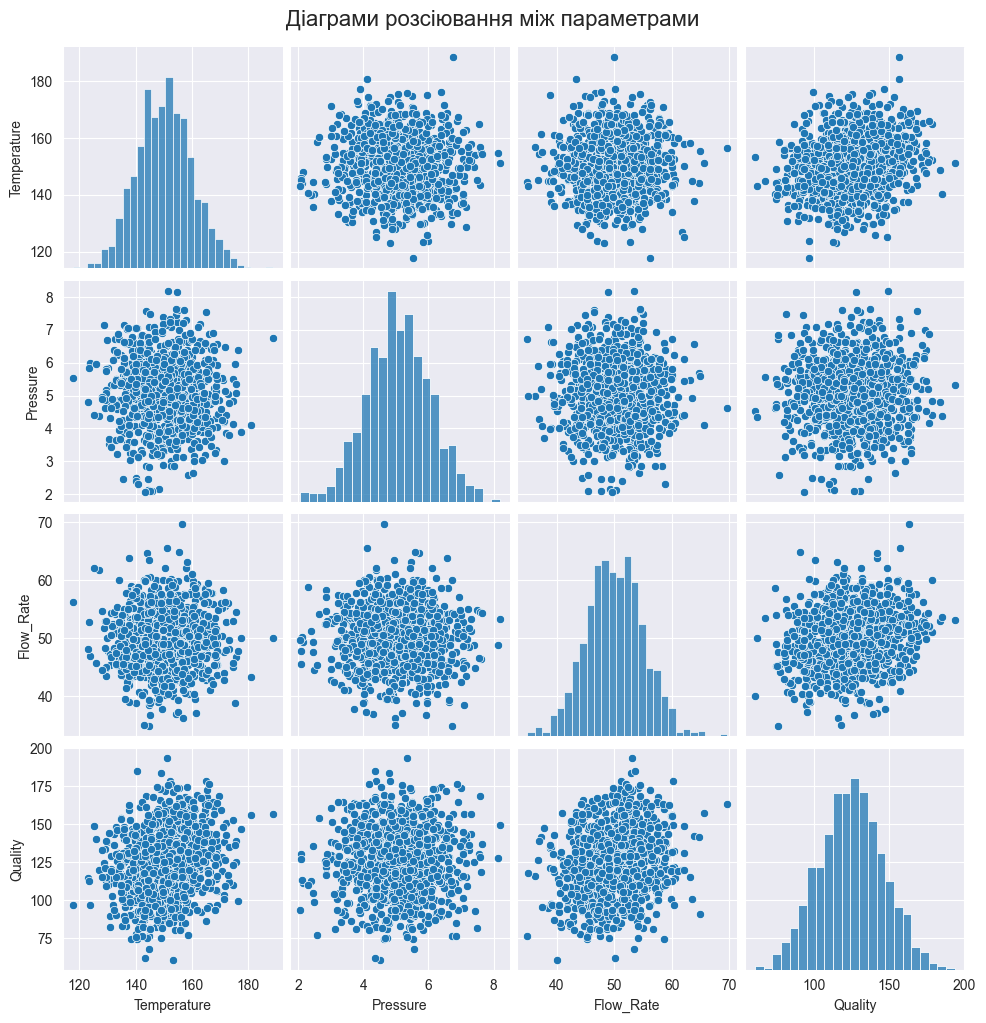

In [6]:
# Перевірка на наявність пропущених значень
print("\nКількість пропущених значень у кожному стовпці:")
display(loaded_data.isnull().sum())
# Візуалізація розподілу окремих параметрів (гістограми)
loaded_data.hist(bins=30, figsize=(15, 10))
plt.suptitle("Розподіл параметрів технологічного процесу", y=0.95, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
# Візуалізація взаємозв'язків між параметрами (матриця кореляцій)
plt.figure(figsize=(10, 8))
sns.heatmap(loaded_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матриця кореляцій між параметрами", fontsize=16)
plt.show()
# Візуалізація взаємозв'язку між вхідними параметрами та якістю (діаграми розсіювання)
sns.pairplot(loaded_data[['Temperature', 'Pressure', 'Flow_Rate', 'Quality']])
plt.suptitle("Діаграми розсіювання між параметрами", y=1.02, fontsize=16)
plt.show()

# Крок 3.1: Розширений розвідувальний аналіз даних (EDA)
Мета цього кроку — підсилити Крок 3 шляхом:
- табличної реплікації ключових візуалізацій (частотні таблиці для гістограм, розширені матриці кореляцій);
- додавання додаткових кількісних характеристик (скошеність, ексцес, квантілі, IQR та викиди);
- розширення візуалізацій (boxplot, violin, KDE, pairplot з регресією, jointplot, QQ-плоти).

### 3.1. Табличні характеристики даних

#### 3.1.1. Відсутні значення та базові розміри

In [ ]:
missing_table = (
    loaded_data.isnull().sum()
    .rename('missing_count')
    .to_frame()
)
missing_table['missing_rate_%'] = (missing_table['missing_count'] / len(loaded_data) * 100).round(2)
size_info = pd.DataFrame({'rows':[len(loaded_data)], 'columns':[loaded_data.shape[1]]})

print('Розміри DataFrame:')
display(size_info)
print('\nВідсутні значення:')
display(missing_table)

#### 3.1.2. Описова статистика (розширена)

In [8]:
# Базова describe
desc = loaded_data.describe().T
# Додаткові метрики
extra = pd.DataFrame({
    'variance': loaded_data.var(),
    'skewness': loaded_data.skew(numeric_only=True),
    'kurtosis': loaded_data.kurt(numeric_only=True)
})
# Квантілі
quantiles = loaded_data.quantile([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).T
quantiles.columns = [f"q{int(q*100)}" for q in quantiles.columns]

extended_stats = desc.join(extra, how='left').join(quantiles, how='left')
extended_stats = extended_stats.round(4)

print('Розширена описова статистика:')
display(extended_stats)

Розширена описова статистика:


,count,mean,std,min,25%,50%,75%,max,variance,skewness,kurtosis,q1,q5,q10,q25,q50,q75,q90,q95,q99
Temperature,1000.0,150.1933,9.7922,117.5873,143.5241,150.2530,156.4794,188.5273,95.8864,0.1170,0.0726,129.1765,134.7405,137.5524,143.5241,150.2530,156.4794,163.0565,166.7697,173.1597
Pressure,1000.0,5.0708,0.9975,2.0596,4.3938,5.0631,5.7289,8.1931,0.9949,-0.0494,0.0584,2.5750,3.4234,3.8063,4.3938,5.0631,5.7289,6.3294,6.6954,7.3202
Flow_Rate,1000.0,50.0292,4.9173,34.9024,46.7600,49.9987,53.3046,69.6312,24.1796,0.0612,0.1722,38.8084,42.1707,43.8025,46.7600,49.9987,53.3046,56.2245,58.0882,61.8218
Quality,1000.0,124.8873,21.4858,60.9449,110.0898,124.9263,139.2172,193.5990,461.6402,0.0358,-0.2052,77.0021,89.6073,96.6321,110.0898,124.9263,139.2172,152.7114,161.0729,174.1723


#### 3.1.3. Кореляції (Pearson, Spearman, Kendall)

In [10]:
pearson_corr = loaded_data.corr(numeric_only=True, method='pearson')
spearman_corr = loaded_data.corr(numeric_only=True, method='spearman')
kendall_corr = loaded_data.corr(numeric_only=True, method='kendall')

print('Матриця кореляцій (Pearson):')
display(pearson_corr)
print('\nМатриця кореляцій (Spearman):')
display(spearman_corr)
print('\nМатриця кореляцій (Kendall):')
display(kendall_corr)

Матриця кореляцій (Pearson):


,Temperature,Pressure,Flow_Rate,Quality
Temperature,1.000000,-0.040400,0.022129,0.215439
Pressure,-0.040400,1.000000,-0.011199,0.029294
Flow_Rate,0.022129,-0.011199,1.000000,0.207730
Quality,0.215439,0.029294,0.207730,1.000000



Матриця кореляцій (Spearman):


,Temperature,Pressure,Flow_Rate,Quality
Temperature,1.000000,-0.063765,0.036477,0.216500
Pressure,-0.063765,1.000000,-0.009203,0.017916
Flow_Rate,0.036477,-0.009203,1.000000,0.202714
Quality,0.216500,0.017916,0.202714,1.000000



Матриця кореляцій (Kendall):


,Temperature,Pressure,Flow_Rate,Quality
Temperature,1.000000,-0.043828,0.023916,0.143764
Pressure,-0.043828,1.000000,-0.006266,0.012208
Flow_Rate,0.023916,-0.006266,1.000000,0.136464
Quality,0.143764,0.012208,0.136464,1.000000


#### 3.1.4. Реплікація гістограм у вигляді частотних таблиць

In [11]:
freq_tables = {}
num_bins = 20
for col in ['Temperature', 'Pressure', 'Flow_Rate', 'Quality']:
    bins = np.histogram_bin_edges(loaded_data[col].dropna(), bins=num_bins)
    cats = pd.cut(loaded_data[col], bins=bins, include_lowest=True)
    tbl = cats.value_counts().sort_index()
    rel = (tbl / tbl.sum() * 100).round(2)
    freq_tables[col] = pd.DataFrame({'count': tbl, 'percent_%': rel})

for col, tbl in freq_tables.items():
    print(f'Частотна таблиця для {col}:')
    display(tbl)
    print('\n')

Частотна таблиця для Temperature:


,count,percent_%
Temperature,,
"(117.586, 121.134]",1,0.1
"(121.134, 124.681]",3,0.3
"(124.681, 128.228]",5,0.5
"(128.228, 131.775]",17,1.7
"(131.775, 135.322]",34,3.4
"(135.322, 138.869]",62,6.2
"(138.869, 142.416]",94,9.4
"(142.416, 145.963]",134,13.4
"(145.963, 149.51]",118,11.8




Частотна таблиця для Pressure:


,count,percent_%
Pressure,,
"(2.059, 2.366]",6,0.6
"(2.366, 2.673]",6,0.6
"(2.673, 2.98]",6,0.6
"(2.98, 3.286]",19,1.9
"(3.286, 3.593]",33,3.3
"(3.593, 3.9]",46,4.6
"(3.9, 4.206]",71,7.1
"(4.206, 4.513]",94,9.4
"(4.513, 4.82]",114,11.4




Частотна таблиця для Flow_Rate:


,count,percent_%
Flow_Rate,,
"(34.901, 36.639]",3,0.3
"(36.639, 38.375]",5,0.5
"(38.375, 40.112]",13,1.3
"(40.112, 41.848]",23,2.3
"(41.848, 43.585]",48,4.8
"(43.585, 45.321]",75,7.5
"(45.321, 47.058]",107,10.7
"(47.058, 48.794]",131,13.1
"(48.794, 50.53]",140,14.0




Частотна таблиця для Quality:


,count,percent_%
Quality,,
"(60.944, 67.578]",2,0.2
"(67.578, 74.21]",1,0.1
"(74.21, 80.843]",13,1.3
"(80.843, 87.476]",25,2.5
"(87.476, 94.108]",42,4.2
"(94.108, 100.741]",56,5.6
"(100.741, 107.374]",71,7.1
"(107.374, 114.007]",92,9.2
"(114.007, 120.639]",120,12.0


#### 3.1.5. Виявлення викидів (IQR-метод) та їх підрахунок

In [12]:
iqr_table = []
for col in ['Temperature', 'Pressure', 'Flow_Rate', 'Quality']:
    q1, q3 = loaded_data[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    outliers = ((loaded_data[col] < lower) | (loaded_data[col] > upper)).sum()
    iqr_table.append({'feature': col, 'Q1': q1, 'Q3': q3, 'IQR': iqr, 'lower_bound': lower, 'upper_bound': upper, 'outliers_count': outliers})

iqr_table = pd.DataFrame(iqr_table)
iqr_table = iqr_table.round(4)
print('IQR-аналіз викидів:')
display(iqr_table)

IQR-аналіз викидів:


,feature,Q1,Q3,IQR,lower_bound,upper_bound,outliers_count
0,Temperature,143.5241,156.4794,12.9553,124.0911,175.9125,8
1,Pressure,4.3938,5.7289,1.3351,2.3911,7.7316,8
2,Flow_Rate,46.7600,53.3046,6.5446,36.9431,63.1214,10
3,Quality,110.0898,139.2172,29.1275,66.3986,182.9084,5


#### 3.2. Розширені візуалізації

> У цьому підрозділі візуалізації доповнюють Крок 3: boxplot/violin для розподілів, KDE для щільностей, pairplot з регресійними лініями, jointplot для парних зв’язків, QQ-плоти для перевірки нормальності.

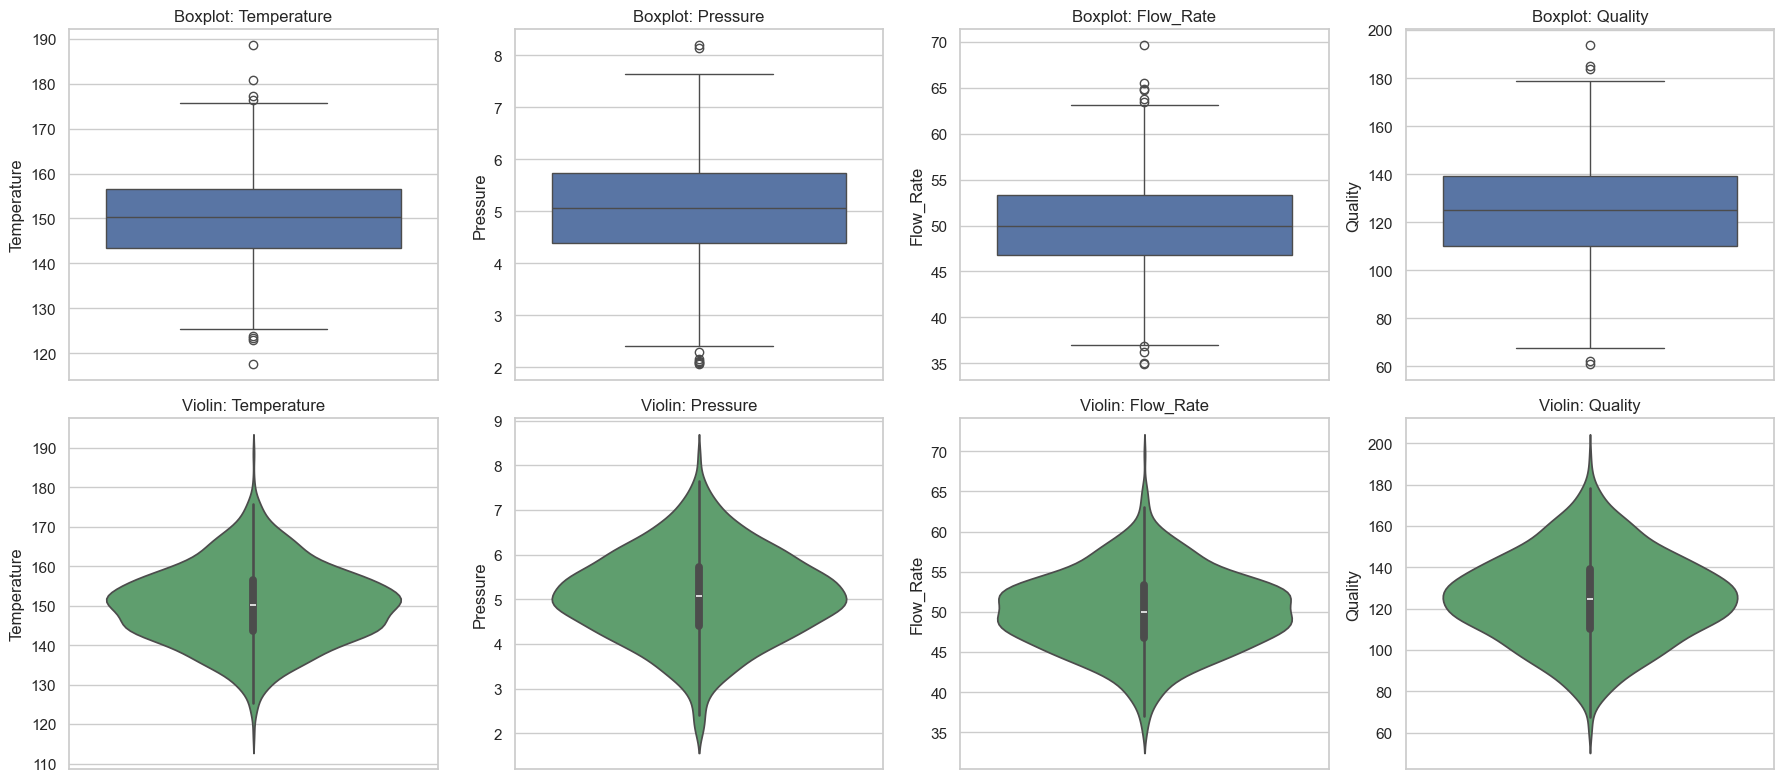

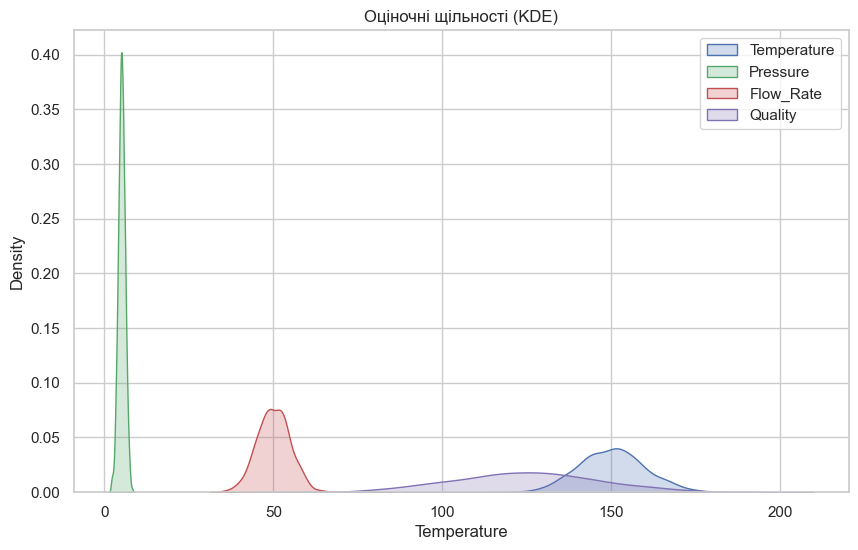

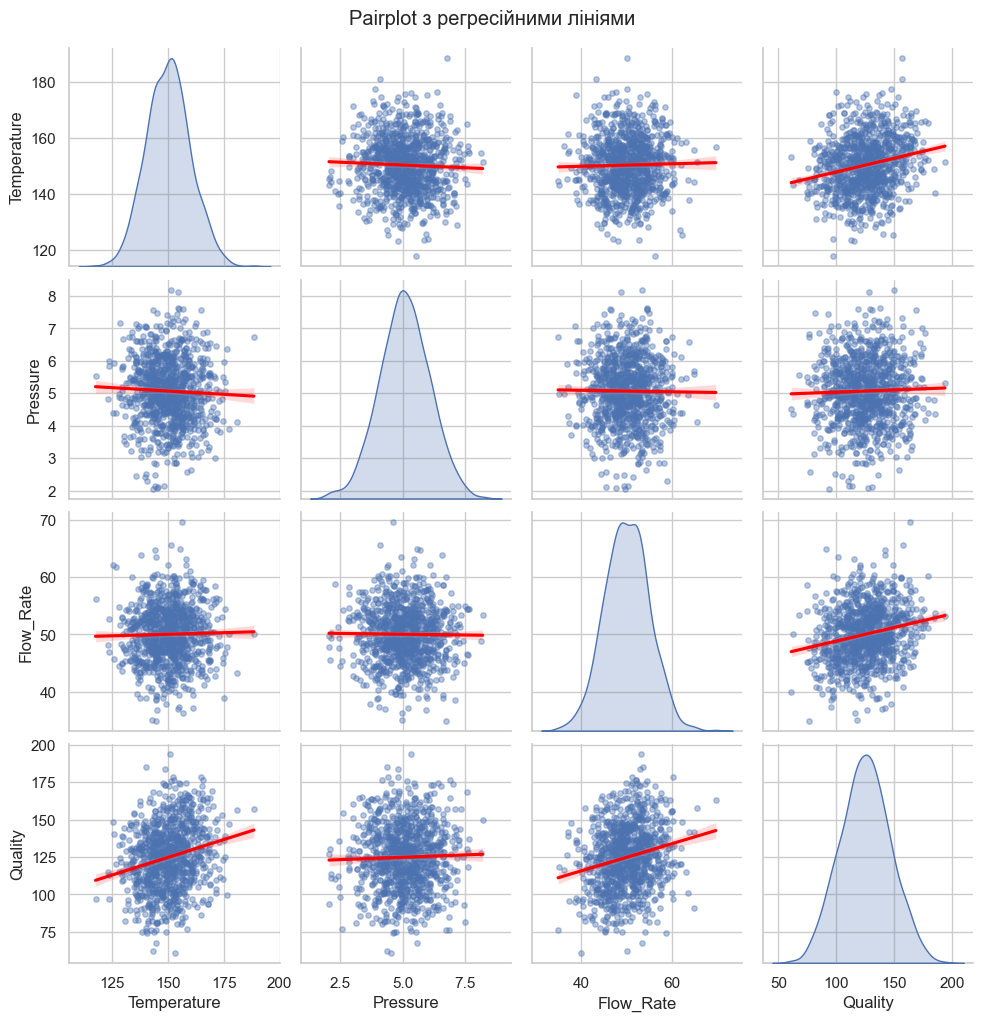

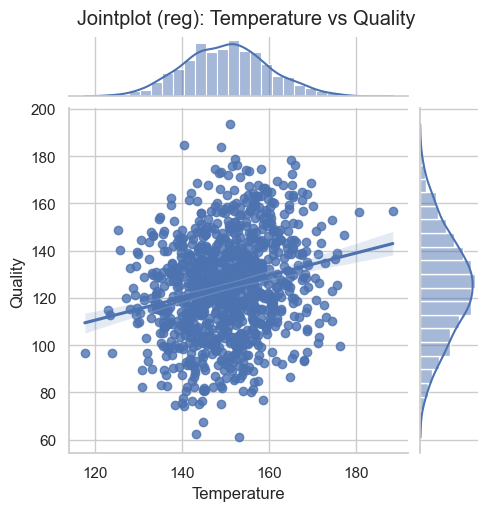

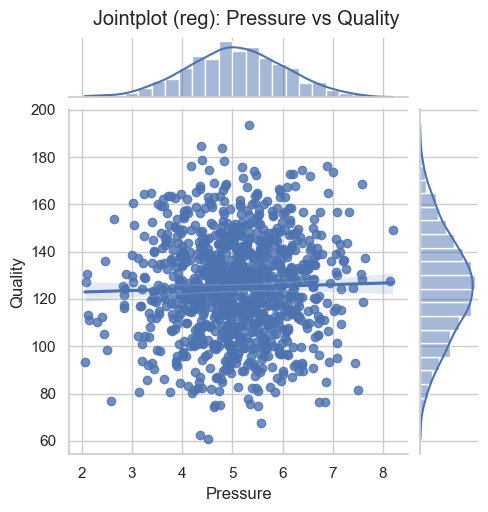

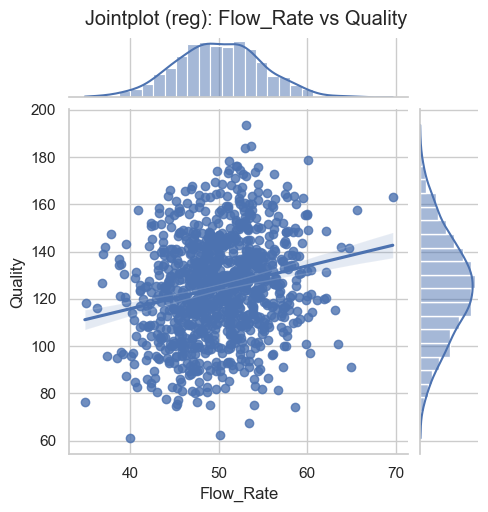

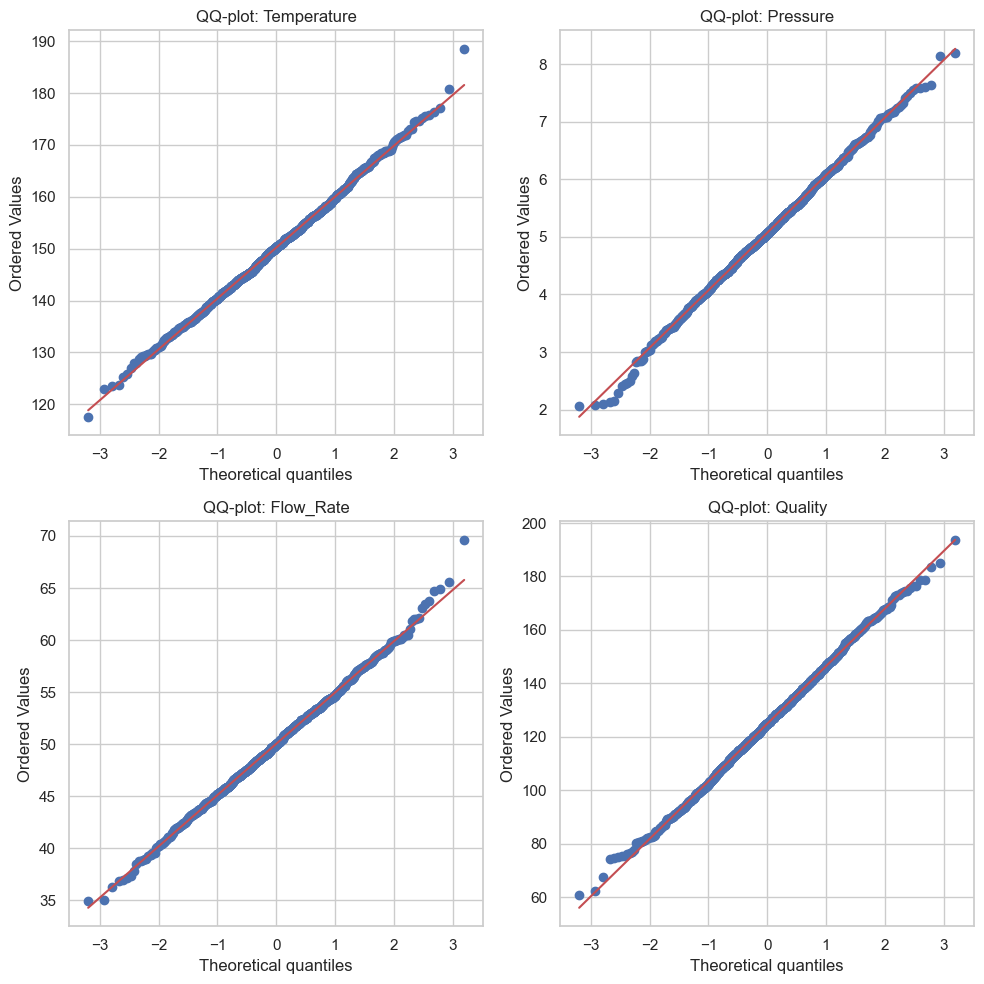

In [18]:
from scipy import stats

sns.set_theme(style='whitegrid', context='notebook')

# 1) Boxplot та Violin plot
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
for i, col in enumerate(['Temperature', 'Pressure', 'Flow_Rate', 'Quality']):
    sns.boxplot(y=loaded_data[col], ax=axes[0, i], color='#4C72B0')
    axes[0, i].set_title(f'Boxplot: {col}')
    sns.violinplot(y=loaded_data[col], ax=axes[1, i], color='#55A868')
    axes[1, i].set_title(f'Violin: {col}')
plt.tight_layout()
plt.show()

# 2) KDE (щільності)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for col, color in zip(['Temperature', 'Pressure', 'Flow_Rate', 'Quality'], ['#4C72B0','#55A868','#C44E52','#8172B3']):
    sns.kdeplot(loaded_data[col], fill=True, alpha=0.25, ax=ax, label=col, color=color)
ax.set_title('Оціночні щільності (KDE)')
ax.legend()
plt.show()

# 3) Pairplot з регресією
sns.pairplot(loaded_data[['Temperature','Pressure','Flow_Rate','Quality']], kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{'alpha':0.4, 's':15}})
plt.suptitle('Pairplot з регресійними лініями', y=1.02)
plt.show()

# 4) Jointplot для кожного предиктора з ціллю
for col in ['Temperature','Pressure','Flow_Rate']:
    sns.jointplot(data=loaded_data, x=col, y='Quality', kind='reg', height=5, color='#4C72B0')
    plt.suptitle(f'Jointplot (reg): {col} vs Quality', y=1.02)
    plt.show()

# 5) QQ-плоти для перевірки нормальності
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for ax, col in zip(axes.flatten(), ['Temperature','Pressure','Flow_Rate','Quality']):
    stats.probplot(loaded_data[col], dist='norm', plot=ax)
    ax.set_title(f'QQ-plot: {col}')
plt.tight_layout()
plt.show()

### 3.3. Додаткові табличні огляди зв’язків із якістю

#### 3.3.1. Парні кореляції з ціллю

In [15]:
with_quality = pd.DataFrame({
    'Pearson_corr_with_Quality': loaded_data.corr(numeric_only=True, method='pearson')['Quality'],
    'Spearman_corr_with_Quality': loaded_data.corr(numeric_only=True, method='spearman')['Quality'],
    'Kendall_corr_with_Quality': loaded_data.corr(numeric_only=True, method='kendall')['Quality']
})
with_quality = with_quality.drop(index='Quality')
with_quality = with_quality.round(4)
print('Кореляції ознак з Quality:')
display(with_quality)

Кореляції ознак з Quality:


,Pearson_corr_with_Quality,Spearman_corr_with_Quality,Kendall_corr_with_Quality
Temperature,0.2154,0.2165,0.1438
Pressure,0.0293,0.0179,0.0122
Flow_Rate,0.2077,0.2027,0.1365


#### 3.3.2. Таблиці агрегування за бінованими інтервалами

In [17]:
# Бінування Temperature та агрегування середнього Quality у бінових групах
bins_temp = pd.cut(loaded_data['Temperature'], bins=10)
agg_temp = loaded_data.groupby(bins_temp, observed=True)['Quality'].agg(['count','mean','std','min','max']).round(3)
print('Агрегування Quality за бінованою Temperature:')
display(agg_temp)

# Бінування Pressure
bins_press = pd.cut(loaded_data['Pressure'], bins=8)
agg_press = loaded_data.groupby(bins_press, observed=True)['Quality'].agg(['count','mean','std','min','max']).round(3)
print('\nАгрегування Quality за бінованим Pressure:')
display(agg_press)

# Бінування Flow_Rate
bins_flow = pd.cut(loaded_data['Flow_Rate'], bins=10)
agg_flow = loaded_data.groupby(bins_flow, observed=True)['Quality'].agg(['count','mean','std','min','max']).round(3)
print('\nАгрегування Quality за бінованим Flow_Rate:')
display(agg_flow)

Агрегування Quality за бінованою Temperature:


,count,mean,std,min,max
Temperature,,,,,
"(117.516, 124.681]",4,105.277,9.891,96.722,114.832
"(124.681, 131.775]",22,121.050,16.844,82.353,148.674
"(131.775, 138.869]",96,119.958,18.779,74.752,162.479
"(138.869, 145.963]",228,119.360,21.055,62.266,184.883
"(145.963, 153.057]",272,124.838,21.180,75.250,193.599
"(153.057, 160.151]",226,127.928,22.488,60.945,174.549
"(160.151, 167.245]",104,133.957,20.280,86.629,178.527
"(167.245, 174.339]",38,129.667,20.745,93.410,168.765
"(174.339, 181.433]",9,132.198,19.276,99.724,156.337



Агрегування Quality за бінованим Pressure:


,count,mean,std,min,max
Pressure,,,,,
"(2.053, 2.826]",12,114.077,20.591,77.007,154.040
"(2.826, 3.593]",58,123.685,20.230,80.757,164.720
"(3.593, 4.36]",168,125.716,21.391,80.273,176.408
"(4.36, 5.126]",290,123.936,21.508,60.945,184.883
"(5.126, 5.893]",260,124.590,21.696,67.619,193.599
"(5.893, 6.66]",156,127.205,20.846,85.308,174.549
"(6.66, 7.426]",47,125.748,23.491,76.260,176.307
"(7.426, 8.193]",9,126.158,26.561,81.680,168.700



Агрегування Quality за бінованим Flow_Rate:


,count,mean,std,min,max
Flow_Rate,,,,,
"(34.868, 38.375]",8,120.145,24.377,76.260,147.394
"(38.375, 41.848]",36,112.226,19.780,60.945,157.432
"(41.848, 45.321]",123,118.874,21.370,74.752,165.976
"(45.321, 48.794]",238,120.916,20.711,76.521,167.843
"(48.794, 52.267]",259,126.956,20.417,62.266,178.527
"(52.267, 55.74]",217,129.553,22.177,67.619,193.599
"(55.74, 59.213]",90,129.530,19.754,74.291,172.639
"(59.213, 62.685]",22,132.844,20.923,96.913,178.598
"(62.685, 66.158]",6,124.724,26.267,90.957,157.457


## Крок 4: Висновки
### 1. Діапазони значень основних параметрів
- **Temperature (°C)**
  - Мін/макс: ≈ 117.6 – 188.5
  - Медіана: ≈ 150.25, IQR: ≈ 12.96 (Q1≈143.52; Q3≈156.48)
  - Розподіл близький до нормального (KDE, гістограма, QQ-plot); кілька помірних викидів у хвостах.
- **Pressure (atm)**
  - Мін/макс: ≈ 2.06 – 8.19
  - Медіана: ≈ 5.06, IQR: ≈ 1.34 (Q1≈4.39; Q3≈5.73)
  - Розподіл близький до нормального; поодинокі крайні значення.
- **Flow_Rate (л/хв)**
  - Мін/макс: ≈ 34.90 – 69.63
  - Медіана: ≈ 50.00, IQR: ≈ 6.54 (Q1≈46.76; Q3≈53.30)
  - Розподіл близький до нормального; помірна кількість крайніх значень у хвостах.
- **Quality (умовні од.)**
  - Мін/макс: ≈ 60.94 – 193.60
  - Медіана: ≈ 124.93, IQR: ≈ 29.13 (Q1≈110.09; Q3≈139.22)
  - Розподіл близький до нормального; кілька спостережень у верхньому хвості.

### 2. Наявність пропущених значень
- **Пропущені значення відсутні** у всіх змінних (`Temperature`, `Pressure`, `Flow_Rate`, `Quality` мають по 0 пропусків).

### 3. Кореляції між параметрами
- **Матриця кореляцій (Pearson)** вказує на такі зв’язки з `Quality`:
  - `Temperature` ↗ з `Quality`: r ≈ 0.215 (слабко-помірний позитивний зв’язок).
  - `Flow_Rate` ↗ з `Quality`: r ≈ 0.208 (слабко-помірний позитивний зв’язок).
  - `Pressure` ~ `Quality`: r ≈ 0.029 (зв’язок практично відсутній).
- **Spearman/Kendall** підтверджують монотонні зв’язки подібної сили:
  - Spearman: `Temperature` ≈ 0.217; `Flow_Rate` ≈ 0.203; `Pressure` ≈ 0.018.
  - Kendall: `Temperature` ≈ 0.144; `Flow_Rate` ≈ 0.136; `Pressure` ≈ 0.012.

### 4. Залежність якості від інших параметрів
- Візуалізації (`pairplot` з регресійними лініями, `jointplot`) показують, що:
  - `Quality` має **позитивну лінійну тенденцію** з `Temperature` та `Flow_Rate`.
  - Вплив `Pressure` на `Quality` **мінімальний** і статистично слабкий.
- Агрегування за бінованими інтервалами (`Крок 3.1`) узгоджується з висновками: середнє `Quality` зазвичай зростає разом із біном `Temperature`/`Flow_Rate`; для `Pressure` вираженої залежності не спостерігається.

### 5. Викиди та нормальність
- За IQR-методом кількість викидів невелика (кілька спостережень на змінну), тому **глобальні оцінки стійкі**.
- QQ-плоти свідчать про **наближеність розподілів до нормальних** з помірними відхиленнями у крайніх значеннях.

### 6. Підсумкові тези
- Дані повні та якісні для базового моделювання: пропуски відсутні, розподіли добре поводяться.
- Найбільш інформативні предиктори для `Quality`: **Temperature** та **Flow_Rate** (синхронно позитивні й подібної сили).
- `Pressure` майже не впливає на `Quality` у поточній симуляції.
- Отримані закономірності узгоджуються з побудовою даних (лінійна залежність якості від температури та швидкості потоку з додаванням шуму).